In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Nos ayuda a crear arboles de descision
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import linear_model

In [ ]:
df = pd.read_csv('ena_12_os.csv')

In [ ]:
df.shape

(16249, 15)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Edad', 'Escolaridad', 'Salario', 'Fuma_p', 'Fuma_f',
       'Marihuana_p', 'Alcohol_p', 'Alcohol_f', 'Sexo_femenino',
       'Estado_civil_Si', 'Religión_Si', 'Trabaja_sí', 'Seguro_medico_sí',
       'Fuma_sí'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,Edad,Escolaridad,Salario,Fuma_p,Fuma_f,Marihuana_p,Alcohol_p,Alcohol_f,Sexo_femenino,Estado_civil_Si,Religión_Si,Trabaja_sí,Seguro_medico_sí,Fuma_sí
0,0,13,7,1.0,0,0,0,0,0,0,1,1,0,0,1
1,1,18,12,3.0,0,0,0,0,13,0,1,1,1,1,1
2,2,33,16,2.0,0,0,0,0,6,0,1,1,1,0,1
3,3,32,16,2.0,0,0,0,0,13,0,0,1,1,1,1
4,4,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

Unnamed: 0            int64
Edad                  int64
Escolaridad           int64
Salario             float64
Fuma_p                int64
Fuma_f                int64
Marihuana_p           int64
Alcohol_p             int64
Alcohol_f             int64
Sexo_femenino         int64
Estado_civil_Si       int64
Religión_Si           int64
Trabaja_sí            int64
Seguro_medico_sí      int64
Fuma_sí               int64
dtype: object

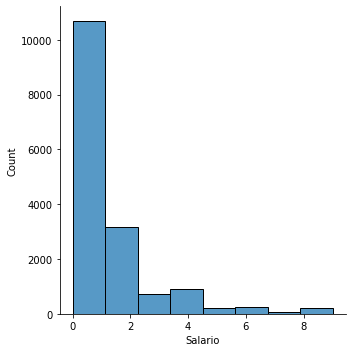

In [ ]:
sns.displot(df.Salario, bins=8)

In [ ]:
X = df[['Edad', 'Trabaja_sí', 'Escolaridad', 'Sexo_femenino', 'Estado_civil_Si']]
y = df[['Salario']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)
model = DecisionTreeRegressor(criterion='mse', max_depth=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Profundidad del árbol: 5
Número de nodos terminales: 16


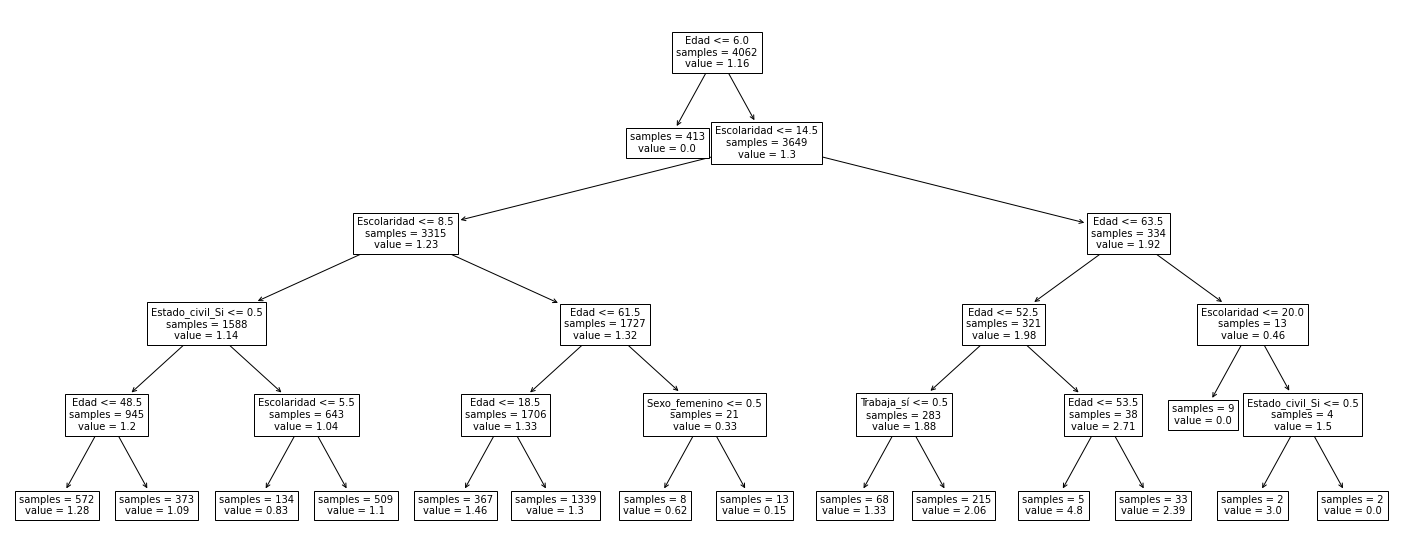

In [ ]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(25, 10))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names =X.columns,
            class_names   = 'Salario',
            filled        = False,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

#### Graficas

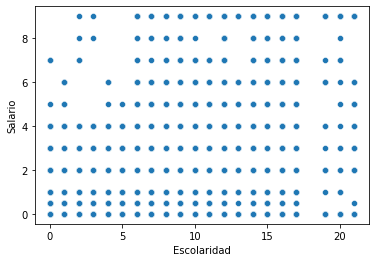

In [ ]:
sns.scatterplot(x=df.Escolaridad, y=df.Salario, data=df)

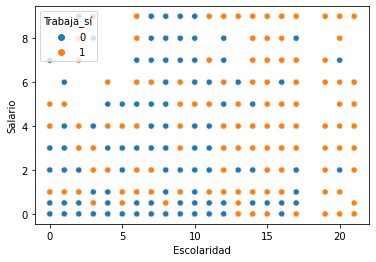

In [ ]:
sns.scatterplot(x=df.Escolaridad, y=df.Salario, data=df, hue=df.Trabaja_sí)

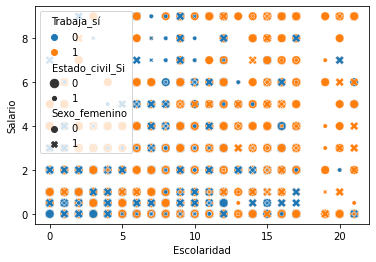

In [ ]:
sns.scatterplot(x=df.Escolaridad, y=df.Salario, data=df, hue=df.Trabaja_sí, size=df.Estado_civil_Si, style=df.Sexo_femenino)

#### Importancia predictoras

In [ ]:
importancia_predictoras = pd.DataFrame(
    {'predictor' : X.columns,
     'importancia' : model.feature_importances_}
)
print('Importancia de los predisctores en el modelo')
print("---------------------------------------------")
importancia_predictoras.sort_values('importancia', ascending=False)

Importancia de los predisctores en el modelo
---------------------------------------------


,predictor,importancia
0,Edad,0.760688
2,Escolaridad,0.190556
1,Trabaja_sí,0.028069
4,Estado_civil_Si,0.019551
3,Sexo_femenino,0.001137


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9)
logit_model = linear_model.LogisticRegression()
logit_model.fit(X_train,y_train)

#Mostramos los valores del modelo.
print("el ajuste es: ",logit_model.score(X_train,y_train))
print("el intercepto (b0): ",logit_model.intercept_)
print("los coeficientes(b0): ",logit_model.coef_)

NameError: ignored

In [ ]:
predicciones = model.predict(X_test)
error2 = (y_test - predicciones)**2
RSME = np.sqrt(sum(error2)/len(y_test))
RSME

NameError: ignored

In [ ]:
#Estas librerias nos ayudan a crear un arbol dependiendo de las variables 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  RandomForestRegressor
import random

In [ ]:
#Estima las salidas de los numeros de arboles, 
bosque = RandomForestRegressor(n_estimators= 100, oob_score=True, n_jobs=2, random_state= 21)

In [ ]:
bosque.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=2, oob_score=True,
                      random_state=21, verbose=0, warm_start=False)

In [ ]:
bosque.feature_importances_

array([0.49075006, 0.07402981, 0.28495775, 0.08096351, 0.06929888])

In [ ]:
print('Serie 1:', random.random(), random.random())
print('Serie 2:', random.random(), random.random())

Serie 1: 0.6032764328331716 0.1385615509796232
Serie 2: 0.827808897968082 0.20424421354740419


In [ ]:
random.seed(0)
print('Serie 1:', random.random(), random.random())
random.seed(0)
print('Serie 2:', random.random(), random.random())

Serie 1: 0.8444218515250481 0.7579544029403025
Serie 2: 0.8444218515250481 0.7579544029403025
